##Clustering - K-means

**Estudiantes:** 

*   Nombre: David Hermenegildo Mamani Diaz

    Código de Estudiante: 171597

*   Nombre: Erick Renán Godoy Llanqui

    Código de Estudiante: 171334





    
    

---
Inteligencia Computacional - VIII Ciclo - Grupo B, 2020-2

**Cargando librerías**

In [ ]:
import numpy as np #Cálculos científicos 
import pandas as pd #Análisis de datos 
import matplotlib.pyplot as plt #Creacion de gráficos 
from sklearn.cluster import KMeans # Metodo de k-means

#Despliegue de gráficos 
%matplotlib inline 

**Importando los datos**

In [ ]:
#Importar archivos CSV a Google Colab Notebook
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
vinos = pd.read_csv('/gdrive/MyDrive/Ejercicios_Colab-David_Hermenegildo/Seg_Unidad/Dataset_II/caracteristicas_de_vinos.csv')

**Caracteristicas de Vinos**

In [ ]:
vinos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Vino             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


**Mostramos las primeras filas**

In [ ]:
vinos.head()

,Vino,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,2,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,3,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,4,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,5,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


**Quitamos la columna "Vino" del análisis de características**

In [ ]:
vinos_variables = vinos.drop(['Vino'], axis=1)

**Obetenemos los estadísticos descriptivos de vinos**

In [ ]:
#Los valores mínimos, máximos, promedio, desviación estándar y los cuartiles de cada columna
vinos_variables.describe()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


**Normalizamos los valores de las características**

In [ ]:
vinos_norm = (vinos_variables-vinos_variables.min())/(vinos_variables.max()-vinos_variables.min())
vinos_norm

#max = 1
#min = 0

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


In [ ]:
vinos_norm.describe()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Busqueda de cantidad optima de clustes**

In [ ]:
wcss = [] #Creando lista vacía, para almacenar los valores  WCSS  que se bayán calculando  

# Crear diferentes cantidades de agrupaciones 
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, max_iter=300)
  kmeans.fit(vinos_norm)    #Aplico k-means a la base de datos
  wcss.append(kmeans.inertia_) #Obtener el valor de WCSS

**Graficando los resultados de WCSS para formar el codo de Jambú**

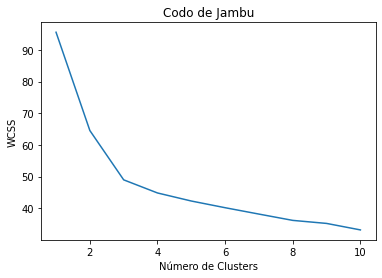

In [ ]:
plt.plot(range(1, 11), wcss) # X=1-10, Y= Tomará los valores contenidos en WCSS
plt.title("Codo de Jambu")
plt.xlabel("Número de Clusters")
plt.ylabel("WCSS")  #WCSS, es un indicador de que tan similares son los individuos dentro de los clusters
plt.show()

**Aplicando el método k-means a la base de datos**

In [ ]:
clustering = KMeans(n_clusters=3, max_iter = 300) #Crea el Modelo
clustering.fit(vinos_norm) #Aplica el modelo a la base de datos

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

**Agregando la clasificación al archivo original**

In [ ]:
vinos['KMeans_Clusters'] = clustering.labels_
vinos.head()

,Vino,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,KMeans_Clusters
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,2,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,3,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,4,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,5,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


**Visualizando los clusters que se formaron**

Aplicamos el análisis de componentes principales para darnos un idea de como se formaron los clusters

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_vinos = pca.fit_transform(vinos_norm)
pca_vinos_df = pd.DataFrame(data = pca_vinos, columns=['Componente_1', 'Componente_2'])
pca_nombres_vinos = pd.concat([pca_vinos_df, vinos[['KMeans_Clusters']]], axis=1)

pca_nombres_vinos

,Componente_1,Componente_2,KMeans_Clusters
0,-0.706336,-0.253193,2
1,-0.484977,-0.008823,2
2,-0.521172,-0.189187,2
3,-0.821644,-0.580906,2
4,-0.202546,-0.059467,2
...,...,...,...
173,0.739510,-0.471901,1
174,0.581781,-0.348366,1
175,0.626313,-0.546857,1
176,0.572991,-0.425516,1


Graficando por medio de los dos componentes principales

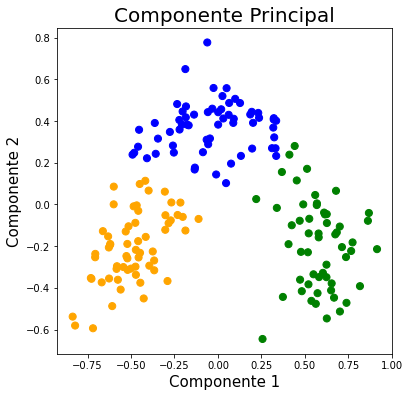

In [ ]:
 fig = plt.figure(figsize=(6,6)) # Tamaño de la figura

 ax = fig.add_subplot(1,1,1) # Indica un gráfico dentro de la figura
 #Nombres de los ejes
 ax.set_xlabel('Componente 1', fontsize = 15)
 ax.set_ylabel('Componente 2', fontsize = 15)
 ax.set_title('Componente Principal', fontsize = 20)

 color_theme = np.array(["blue", "green", "orange"])
 ax.scatter(x=pca_nombres_vinos.Componente_1, y=pca_nombres_vinos.Componente_2,
            c=color_theme[pca_nombres_vinos.KMeans_Clusters], s=50)
 plt.show()

**Grabamos los clusters en el disco duro**



In [ ]:
vinos.to_csv('/gdrive/MyDrive/Ejercicios_Colab-David_Hermenegildo/Seg_Unidad/Dataset_II/Resultado_KMeans.csv')